## Parsing bayenv2 Results

**2020303** NL

Ran bayenv2 with 

```
$ ./calc_bf.sh parcal_mox001_qc_noEldInlet_forBayEnv.txt PC_environfile_noEld_forBE2_likeX.txt PC_noEld_last_matrix.txt 8 100000 29 > be2_log_pc_likeX_try2.txt
```


When converting the Genepop file to the Bayenv format, PGD Spider booted out the following loci and called them monomorphic (I manually checked and they look polymorphic...). 

- WARN  10:33:44 - Locus KN883180_93322 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN883279_194065 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN883764_9981 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN886325_24939 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN886891_15767 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN888648_23821 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN889819_58758 was removed, as it is not polymorphic
- WARN  10:33:44 - Locus KN891058_13136 was removed, as it is not polymorphic

BayEnv gives your SNPs hella dumb names instead of the index or the original name, so I need to do some matching back to figure out which SNPs are those with which Bayes Factors.

In this Notebook, I'm making a dataframe with meaningful column names (env vars), meaningful SNP names (original locus names), and then looking at which SNPs have a lot of evidence for correlation with environmental variables.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### **[1]** Get the names of 2075 PARCAL SNPs, in order

In [24]:
gpfile = open("/mnt/hgfs/E/dDocent_for_mox/parcal_wd/parcal_mox001/parcal_mox001_qc/parcal_mox001_qc.gen","r")
foundpop = False
gp_loci = []
for line in gpfile:
    if line.startswith("#") == False:
        if line.strip() not in ["Pop","pop"]:
            if foundpop == False:
                gp_loci.append(line.strip())
        else:
            foundpop = True

In [25]:
len(gp_loci)

2075

In [26]:
gp_loci[0]

'JXUT01106070_4760'

#### **[2]** Get the names of loci retained in BayEnv analysis

In [27]:
be_loci = list(gp_loci)
loci_to_remove = ['KN883180_93322','KN883279_194065','KN883764_9981','KN886325_24939',
                  'KN886891_15767','KN888648_23821','KN889819_58758','KN891058_13136']
for locus in loci_to_remove:
    be_loci.remove(locus)
print(len(be_loci))

2067


In [28]:
gp_loci[0:5]

['JXUT01106070_4760',
 'JXUT01121266_26861',
 'JXUT01124726_31595',
 'JXUT01126181_4136',
 'JXUT01134574_5560']

In [29]:
be_loci[0:5]

['JXUT01106070_4760',
 'JXUT01121266_26861',
 'JXUT01124726_31595',
 'JXUT01126181_4136',
 'JXUT01134574_5560']

In [30]:
be_loci[-5:]

['KN897709_1466',
 'KN897718_1121',
 'KN897962_5524',
 'KN898056_6022',
 'KN898084_5875']

#### **[3]** Read in data frame and name it better

In [31]:
bayenv_results_path = "bf_environ.PC_environfile_noEld_forBE2_likeX.txt"

In [32]:
col_names = ["LocusName",
              "BO2_salinitymean_ss", # mean salinity at surface
              "BO2_ppmean_ss", # mean primary production at surface
              "BO2_nitratemean_ss", # mean nitrate at surface
              "BO2_phosphatemean_ss", # mean nitrate at surface
              "BO2_dissoxmean_ss", # mean dissox at surface
              "BO2_salinitymean_bdmean", # mean salinity at mean bottom
              "BO2_ppmean_bdmean", # primary production at mean bottom
              "BO2_nitratemean_bdmean", # mean nitrate at mean depth
              "BO2_phosphatemean_bdmean", # mean phosphate at mean depth
              "BO2_dissoxmean_bdmean", # mean dissox at max depth
              "BO_bathymean", # bathymetry
              "BO_ph", # surface pH 
              "BO_calcite", # mean calcite
              "BO2_curvelmax_ss", # surface max current velocity
              "BO2_curvelmin_ss", # surface min current velocity
              "BO2_curvelmean_ss", # surface mean current velocity
              "BO2_curvelrange_ss", # surface range current velocity
              "BO2_curvelmax_bdmean", # mean bottom max current velocity
              "BO2_curvelmin_bdmean", # mean bottom min current velocity
              "BO2_curvelrange_bdmean", # mean bottom range current velocity
              "BO2_curvelmean_bdmean", # mean bottom mean current velocity
              "BO2_tempmax_ss", # max SST
              "BO2_tempmean_ss", # mean SST
              "BO2_tempmin_ss", # min SST
              "BO2_temprange_ss", # range SST
              "BO2_tempmax_bdmean", # maximum temp at mean bottom
              "BO2_tempmean_bdmean", # mean temp at mean bottom
              "BO2_tempmin_bdmean", # min temp at mean bottom
              "BO2_temprange_bdmean"] # range temp at mean bottom

In [38]:
bayenv_df = pd.read_csv(bayenv_results_path, 
                        delimiter = '\t',
                        names = col_names,
                        usecols=range(30))
bayenv_df['LocusName'] = be_loci

In [39]:
bayenv_df

,LocusName,BO2_salinitymean_ss,BO2_ppmean_ss,BO2_nitratemean_ss,BO2_phosphatemean_ss,BO2_dissoxmean_ss,BO2_salinitymean_bdmean,BO2_ppmean_bdmean,BO2_nitratemean_bdmean,BO2_phosphatemean_bdmean,...,BO2_curvelrange_bdmean,BO2_curvelmean_bdmean,BO2_tempmax_ss,BO2_tempmean_ss,BO2_tempmin_ss,BO2_temprange_ss,BO2_tempmax_bdmean,BO2_tempmean_bdmean,BO2_tempmin_bdmean,BO2_temprange_bdmean
0,JXUT01106070_4760,0.17908,0.16851,0.14969,0.17002,0.53951,0.16259,0.14584,0.15669,0.18465,...,0.16536,0.20764,0.14949,0.49566,0.62982,0.57712,0.13527,0.32748,0.71546,0.30758
1,JXUT01121266_26861,0.16633,0.15110,0.19424,0.23665,0.18390,0.23980,0.20146,0.25370,0.31432,...,0.16486,0.28245,0.23118,0.20218,0.20669,0.27794,0.20470,0.22166,0.19740,0.26183
2,JXUT01124726_31595,0.18042,0.17364,0.16884,0.16523,0.16177,0.15685,0.14462,0.16174,0.17142,...,0.14981,0.28754,0.17407,0.15561,0.16510,0.20504,0.15450,0.14452,0.17895,0.17515
3,JXUT01126181_4136,0.70405,0.36597,0.79894,1.46400,0.25361,0.29789,0.29859,0.33259,0.43112,...,0.22518,0.67514,0.50395,0.22251,0.25405,0.42731,0.23644,0.24168,0.25057,0.24774
4,JXUT01134574_5560,0.14846,0.52333,0.22402,0.15857,0.15928,0.16719,0.17348,0.15486,0.16308,...,0.18427,0.26444,0.18844,0.22112,0.20708,0.23850,0.19587,0.23682,0.18841,0.15615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,KN897709_1466,0.33154,0.34357,0.31332,0.38641,0.25870,0.32196,0.32739,0.29614,0.28768,...,0.35552,0.48580,0.35513,0.27556,0.27392,0.32069,0.31454,0.29285,0.27964,0.31520
2063,KN897718_1121,0.24156,0.15951,0.16322,0.40002,0.14986,0.15298,0.14632,0.16173,0.26397,...,0.41226,0.15813,0.16541,0.16352,0.17668,0.34819,0.16526,0.15612,0.17117,0.23626
2064,KN897962_5524,0.20372,3.66530,0.15233,0.31789,0.15033,0.12587,0.15299,0.12020,0.13233,...,0.13919,0.56325,0.29660,0.26165,0.27521,0.72811,0.14577,0.22680,0.23110,0.15588
2065,KN898056_6022,0.78922,0.34455,1.60710,0.60746,0.31751,0.24964,0.38657,0.24690,0.27015,...,0.64865,0.30299,0.29474,0.66837,0.80554,0.55437,0.76635,0.79335,0.82622,0.35790


In [40]:
pd.DataFrame.to_csv(bayenv_df, 
                     path_or_buf="PC_BE2_noEI_likkeX_results.txt", 
                     sep=' ')

#### **[4]** Make results dataframe

Make new dataframe of significant results

For each significant result (BF > 3.2):

SNP Name, Env Var, BF, QualSupport

In [41]:
def get_support(x):
    if x >= 3.2 and x < 10:
        return("Substantial")
    elif x >= 10 and x < 100:
        return("Strong")
    elif x > 100:
        return("Decisive")
    else:
        print("Something went wrong in determining qualititative support")

In [42]:
get_support(5)

'Substantial'

In [43]:
get_support(0)

Something went wrong in determining qualititative support


In [44]:
get_support(22)

'Strong'

In [45]:
get_support(200)

'Decisive'

In [46]:
results_for_df = []
for col_name in col_names[1:]:
    for locus_index, locus_name in enumerate(be_loci):
        bf = bayenv_df[col_name][locus_index]
        if bf > 3.2: # worth recording
            row_to_add = [locus_name, col_name, bf,get_support(bf)]
            results_for_df.append(row_to_add)

adaploci_df = pd.DataFrame(results_for_df, columns=["Locus","EnvVar","BayesFactor","SupporLevel"])
adaploci_df                    

,Locus,EnvVar,BayesFactor,SupporLevel
0,JXUT01148300_7234,BO2_salinitymean_ss,254.2400,Decisive
1,JXUT01149588_72,BO2_salinitymean_ss,5.2797,Substantial
2,KN882279_143097,BO2_salinitymean_ss,4.2679,Substantial
3,KN882296_275843,BO2_salinitymean_ss,75.8340,Strong
4,KN882304_105905,BO2_salinitymean_ss,46.2500,Strong
...,...,...,...,...
1126,KN887443_42417,BO2_temprange_bdmean,9.1023,Substantial
1127,KN888316_12766,BO2_temprange_bdmean,7.8041,Substantial
1128,KN888353_7556,BO2_temprange_bdmean,4.3606,Substantial
1129,KN893605_21066,BO2_temprange_bdmean,6.1739,Substantial


In [47]:
pd.DataFrame.to_csv(adaploci_df, 
                     path_or_buf="PC_BE2_noEI_likeX_putadap_results.txt", 
                     sep='\t')

In [48]:
len(set(adaploci_df['Locus']))

422

^ one more than with Eld Inlet

## Plotting distribution of bayes factors to look for "biologically relevant" cutoff

**20200206** NL

Some folks in my lab look for natural breaks in the data as a sign of biologial relevance. Sometimes I agree, sometimes I don't, but thought it was worth looking at at least!

In [49]:
# add log Bayes Factor column

In [50]:
adaploci_df['LogBF'] = np.log10(adaploci_df['BayesFactor'])

In [51]:
adaploci_df.iloc[0:5,]

,Locus,EnvVar,BayesFactor,SupporLevel,LogBF
0,JXUT01148300_7234,BO2_salinitymean_ss,254.2400,Decisive,2.405244
1,JXUT01149588_72,BO2_salinitymean_ss,5.2797,Substantial,0.722609
2,KN882279_143097,BO2_salinitymean_ss,4.2679,Substantial,0.630214
3,KN882296_275843,BO2_salinitymean_ss,75.8340,Strong,1.879864
4,KN882304_105905,BO2_salinitymean_ss,46.2500,Strong,1.665112


In [52]:
import matplotlib.pyplot as plt

In [53]:
minbf = min(adaploci_df['LogBF'])
maxbf = max(adaploci_df['LogBF'])

In [54]:
maxbf

8.326499714725037

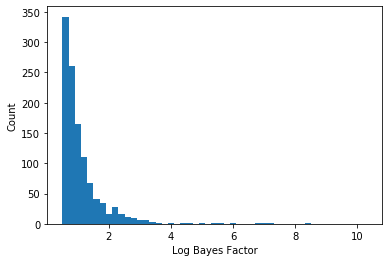

In [55]:
plt.hist(adaploci_df['LogBF'], bins=np.arange(minbf, maxbf+2, 0.2))
plt.xlabel('Log Bayes Factor')
plt.ylabel('Count')
plt.show()

In [56]:
thresh = list(adaploci_df['LogBF'] > 5)
count = 0
for i in thresh:
    if i == True:
        count += 1
        
print("Num SNPs above visible threshold:", count)

Num SNPs above visible threshold: 10


In [57]:

decisive = list(adaploci_df['SupporLevel'] == 'Decisive')
print(thresh[0:5])
count = 0
for i in decisive:
    if i == True:
        count += 1
        
print("Number SNPs decisive support:", count)

[False, False, False, False, False]
Number SNPs decisive support: 104


In [58]:
decisive_df = adaploci_df[adaploci_df['SupporLevel']=='Decisive']

In [59]:
decisive_df

,Locus,EnvVar,BayesFactor,SupporLevel,LogBF
0,JXUT01148300_7234,BO2_salinitymean_ss,254.24,Decisive,2.405244
24,KN883642_77523,BO2_salinitymean_ss,268.51,Decisive,2.428960
27,KN883983_65078,BO2_salinitymean_ss,173.50,Decisive,2.239299
32,KN884325_2292,BO2_salinitymean_ss,142.30,Decisive,2.153205
41,KN885261_62073,BO2_salinitymean_ss,2319.80,Decisive,3.365451
...,...,...,...,...,...
1095,KN886666_21675,BO2_tempmin_bdmean,180.09,Decisive,2.255490
1104,KN889769_63777,BO2_tempmin_bdmean,318.51,Decisive,2.503123
1105,KN890051_22452,BO2_tempmin_bdmean,142.62,Decisive,2.154180
1107,KN890086_21615,BO2_tempmin_bdmean,359590.00,Decisive,5.555808


In [47]:
pwd

'/mnt/hgfs/E/dDocent_for_mox/parcal_wd/parcal_mox001/analyses_CG_PC/bayenv2'

In [60]:
pd.DataFrame.to_csv(adaploci_df, 
                     path_or_buf="PC_BE2_noEI_likeX_decisiveSNPs.txt", 
                     sep='\t')